# Clustering
- Question to ask yourself
    - What is the distance in your data?
    - Do you want groups?
    - Do you want representative element?
    - Do you want outliers?
    - How to define the good number of clusters?

# Unsupervised Learning

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn
from sklearn.datasets import make_blobs
import numpy as np

# Crear los datos con el numero de centros útiles

In [3]:
x, y = make_blobs(50000, 2, centers=3, cluster_std=1, shuffle=True, random_state=0)

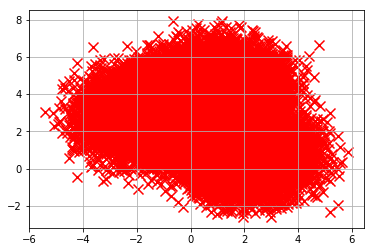

In [4]:
scatter(x[:, 0], x[:, 1], c='red', marker='x', s=100)
grid()

# Crear la instancia de KMeans con el número de centros que creamos necesarios

Utilizando k-means++ para inicializar las seed

In [87]:
from sklearn.cluster import KMeans
kame = KMeans(n_clusters=3, init='k-means++',
              n_init=10, max_iter=300, 
              tol=0.0001, precompute_distances='auto',
              algorithm='auto')

In [88]:
y_predict = kame.fit_predict(x)

In [35]:
y_predict.labels_
y_predict.cluster_centers_

array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0,
       1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1,
       0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 2, 0, 0, 2, 2])

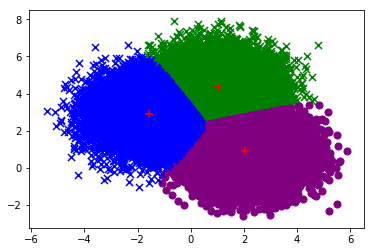

In [89]:
scatter(x[y_predict==0, 0], x[y_predict==0,1 ], s=50, c='green', marker='x', label='cluster 1')
scatter(x[y_predict==1, 0], x[y_predict==1,1 ], s=50, c='purple', marker='o', label='cluster 2')
scatter(x[y_predict==2, 0], x[y_predict==2,1 ], s=50, c='blue', marker='x', label='cluster 3')
#scatter(x[y_predict==3, 0], x[y_predict==3,1 ], s=50, c='black', marker='*', label='cluster 4')
scatter(kame.cluster_centers_[:, 0], kame.cluster_centers_[:, 1], s=50, marker='+', c='red')

# iniciando los clusters manualmente

In [90]:
x_init = np.array([[1, 5], [2, 5], [3, 5]])
km4 = KMeans(n_clusters=3, init=x_init, n_init=1, 
             max_iter=100, tol=1e-4)
y_pred2 = km4.fit_predict(x)

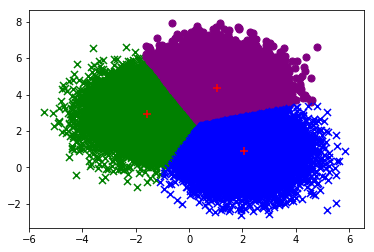

In [91]:
scatter(x[y_pred2==0, 0], x[y_pred2==0,1 ], s=50, c='green', marker='x', label='cluster 1')
scatter(x[y_pred2==1, 0], x[y_pred2==1,1 ], s=50, c='purple', marker='o', label='cluster 2')
scatter(x[y_pred2==2, 0], x[y_pred2==2,1 ], s=50, c='blue', marker='x', label='cluster 3')
scatter(km4.cluster_centers_[:, 0], km4.cluster_centers_[:, 1], s=50, marker='+', c='red')

# Mas centros

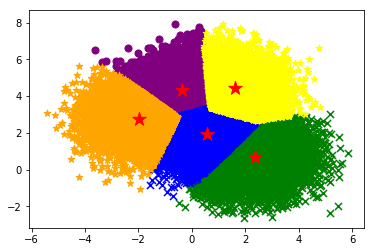

In [92]:
km5 = KMeans(n_clusters=5, init='k-means++', n_init=1, 
             max_iter=100, tol=1e-4)
y_pred3 = km5.fit_predict(x)
scatter(x[y_pred3==0, 0], x[y_pred3==0,1 ], s=50, c='green', marker='x', label='cluster 1')
scatter(x[y_pred3==1, 0], x[y_pred3==1,1 ], s=50, c='purple', marker='o', label='cluster 2')
scatter(x[y_pred3==2, 0], x[y_pred3==2,1 ], s=50, c='blue', marker='x', label='cluster 3')
scatter(x[y_pred3==3, 0], x[y_pred3==3,1 ], s=50, c='yellow', marker='*', label='cluster 4')
scatter(x[y_pred3==4, 0], x[y_pred3==4,1 ], s=50, c='orange', marker='*', label='cluster 5')
scatter(km5.cluster_centers_[:, 0], km5.cluster_centers_[:, 1], s=200, marker='*', c='red')

# Revisar el rendimiento del número de clusters creados:

- Optimizar el número de clusters para no crear clusters que no existen. Nota(un punto de inflexion)

(0, 350)

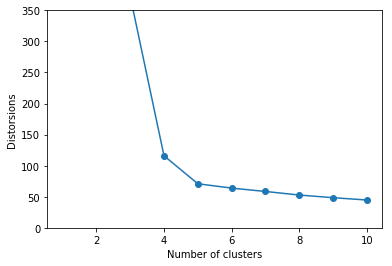

In [98]:
x_test, y_test = make_blobs(n_samples=200, n_features=2,
                            centers=5, cluster_std=0.45,
                            shuffle=True)
distorsions = []
for i in range(1, 11):
    km_test = KMeans(n_clusters=i,
                     init='k-means++',
                     n_init=10,
                     max_iter=500,
                     tol=1e-4,
                     random_state=0)
    km_test.fit(x_test)
    distorsions.append(km_test.inertia_)
plot(range(1, 11), distorsions, marker='o')
xlabel('Number of clusters')
ylabel('Distorsions')
ylim(0, 350)

otro ejemplo

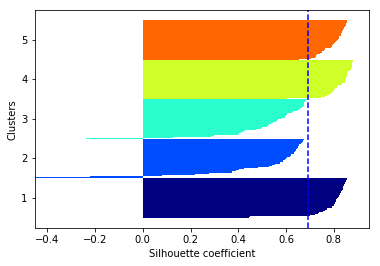

In [104]:
y_km_7 = y_test
x_7 = x_test
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km_7)
n_clusters = cluster_labels.shape[0]
silhouette = silhouette_samples(x_7, y_km_7,
                                metric='euclidean')
y_top = 0
y_bottom = 0
y_ticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette = silhouette[y_km_7 == c]
    c_silhouette.sort()
    y_top += len(c_silhouette)
    color = cm.jet(i/n_clusters*1.)
    barh(range(y_bottom, y_top), c_silhouette, height=1,
         edgecolor='none', color=color)
    y_ticks.append((y_top + y_bottom)/2)
    y_bottom += len(c_silhouette)
silhouette_mean = np.mean(silhouette)
axvline(silhouette_mean, color='blue', linestyle='--')
yticks(y_ticks, cluster_labels + 1)
ylabel('Clusters')
xlabel('Silhouette coefficient')
